In [ ]:
!pip install -U plotly       
!pip install -U geopandas  
!pip install -U mapclassify

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 110   


import geopandas as gpd
import plotly
import plotly.graph_objs as go
import plotly.express as px
import scipy as sp
import shapely                  
from shapely.geometry import *  
import mapclassify.classifiers as classifiers
import statsmodels.api as sm

import json

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Entendimiento del Negocio

Airbnb es una de las plataformas digitales más importantes actualmente en el mundo debido al impacto que ha tenido y el cambio de paradigma que ha presentado a la hora de conseguir hospedaje para el turismo, viajes de negocios y demás al ofrecer variadas opciones de acomodación. Pero esto no sólo es una mejor opción para los turistas sino una oportunidad de negocio para personas que tengan la posibilidad de compartir sus espacios de vivienda con visitantes extranjeros y nacionales. Aún en la situación de COVID - 19, consideramos valioso medir el aporte que tuvo Airbnb en la actividad económica bogotana donde, sí se tiene la oportunidad, se podrían proyectar los datos a futuro. 

Es interesante revisar la visión desde la oferta ya que nos permite tener una idea general con respecto a los ingresos que se perciben por esta actividad económica. En general, por parte de variables como las tarifas promedio y el ingreso mensual es posible mapear la dinámica económica a través de los años analizados (2015 - 2019) y así aproximar, de cierta manera, una recomendación visual para las personas interesadas en conseguir un Airbnb para que vean, por localidad, dónde conseguir relaciones entre buenas calificaciones, precio y localización, etc. 

El objetivo principal, será hacer un análisis descriptivo con la herramienta Python, y principalmente se buscará mirar una relación entre las variables así como patrones en la data que puedan ser útiles a la hora de modelar de manera avanzada (Machine Learning u otros métodos estadísticos) comportamientos futuros de las variables.

Para ello, nos centraremos principalmente en el aspecto de variables que nos interesen que nos den información sobre la demanda y simultáneamente la demanda realizando gráficos de barras, gráficos temporales dinámicos, gráficos de dispersión con las variables de ocupación, las variables de ingresos y tarifas, y las variables de calificación. 

En primer lugar, el esfuerzo será para consolidar, organizar y arreglar la data, haciendo uso de máscaras, localización por índices y limpieza de datos vacíos; así como solucionar errores de tipografía y errores varios 

En segundo lugar, para los resultados, se harán gráficos para ver las relaciones entre las variables utilizando:
* Mapas de calor
* Estimación de correlaciones entre las variables
* Regresiones lineales 
* Pruebas de hipótesis

En tercer lugar, para entender geográficamente la ubicación donde demanda y oferta convergen, se utilizará un mapa de Bogotá por localidades para entender qué tan importante es una localidad en el ingreso de airbnb en la ciudad. 






# 2. Preparación y entendimiento de los datos




In [ ]:
#Información obtenida de:  https://datosabiertos.bogota.gov.co/dataset/barrios_airbnb-bogota-2015-2019-mensual


# Desde acá se descarga la base que se utilizará con el nombre barrios_airbnb.xlsx
!wget -q --no-check-certificate 'https://drive.google.com/uc?export=download&id=1IG1Wnr1_Va6DsWi7fhz2wNtB00gQy94F' -O barrios_airbnb.xlsx


#Vamos a utilizar unicamente las pestañas o sheets de excel que tiene la información, las demas pestañas son informativas
data_Airbnb = pd.concat(pd.read_excel('barrios_airbnb.xlsx', sheet_name = ['2015', '2016', '2017', '2018', '2019']), ignore_index = True)



**Para entender el dataframe se tiene la siguiente tabla con el nombre de las variables y sus definiciones.**

> **Nota:** las letras P, M y S entre paréntesis hacen referencia a la operación realizada (Promedio, Moda y Suma respectivamente) para la agrupación de datos a nivel de Sector Catastral (Barrio)

| Variable | Definición |
|--|--| 
|	Cod_Barrio	|	Identificador único del Sector Catastral (Barrio)	|
|	Barrio	|	Nombre del Sector Catastral (Barrio)	|
|	Vigencia	|	Año en el cual fue creado el anuncio	|
|	Fecha_Corte	|	Mes de reporte	|
|	Tipo_Aloj(M)	|	(Moda estadística) del tipo de alojamiento por Sector Catastral	|
|	Tipo_Alqu(M)	|	Tipo de alquiler; refiere el tipo de alquiler (Moda) en el  Sector Catastral	|
|	Habitaciones(P)	|	Número promedio de habitaciones en el  Sector Catastral (Barrio)	|
|	Tasa_O2(P)	|	Promedio de la Tasa de Ocupación; Obedece al promedio de: Suma de días reservados en el mes por barrio / Suma de días disponibles en el mes por barrio	|
|	Ingreso_USD(S)	|	Suma por Sector Catastral (Barrio), de los ingresos totales (en dólares estadounidenses) obtenidos durante el período del informe.
|| Incluye el precio anunciado desde el momento de la reserva, así como los gastos de limpieza.	|
|	Ingreso_Hab_Dia (S)	|	Suma por Sector Catastral (Barrio), de los ingresos diarios por habitación (en dólares estadounidenses)	|
|	ADR_USD(P)	|	Tarifa diaria promedio (ADR) de noches reservadas en USD. ADR = Ingresos totales / Noches reservadas	|
|	Días_Reservados(P)	|	Número promedio de días calendario clasificados como reservados por Sector Catastral (Barrio)	|
|	Días_Disponibles (P)	|	Número promedio de días calendario clasificados como disponibles por Sector Catastral (Barrio)	|
|	Baños (P)	|	Número promedio de baños por Sector Catastral (Barrio)	|
|	Max_Huéspedes (P)	|	El número máximo promedio de huéspedes que la propiedad de alquiler de vacaciones puede acomodar	|
|	Deposito_USD(P)	|	Promedio del depósito de seguridad en dólares estadounidenses en el Sector Catastral (Barrio)	|
|	Limpieza_USD(P)	|	Promedio del coste de limpieza cobrado por reserva en dólares estadounidenses en el Sector Catastral (Barrio)	|
|	ExtraPeople_USD(P)	|	Promedio de la tarifa de personas extra en dólares estadounidenses en el Sector Catastral (Barrio)	|
|	Cancelación(M)	|	(Moda estadística) de la política de cancelación de la lista de alquileres vacacionales por Sector Catastral (Barrio)	|
|	Public_Noct_USD(P)	|	Promedio de la tarifa nocturna predeterminada para una lista de alquileres de vacaciones en dólares estadounidenses	|
|	Fotos(P)	|	Número promedio de fotos publicadas por Sector Catastral (Barrio)	|
|	Calif_Comunicación(P)	|	Valor promedio de la calificación por comunicación	|
|	Calif-Limpieza(P)	|	Valor promedio de la calificación por limpieza	|
|	Calif_Localización(P)	|	Valor promedio de la calificación por localización	|
|	Calif_Valores(P)	|	Valor promedio de la calificación Valo (Costo)	|
|	Mascotas(M)	|	(Moda estadística) del permiso o no de ingreso de animales de compañía	|
|	Comodidades(M)	|	(Moda estadística) según la cantidad de comodidades anexas	|
|	Localidad	|	Espacio geográfico en que se divide el área urbano y rural del municipio de Bogotá.	|
|	Cant_Propiedades(S)	|	Suma por Sector Catastral (Barrio), de la cantidad de propiedades activas en el barrio durante el mes	|
|	Estrato(M)	|	(Moda estadística) del Estrato Socioeconómico	|
|	Percapita	|	Impuesto promedio por unidad predial: (Recaudo del predial por barrio/Número de unidades prediales en el barrio)	|
|	Media_Arriendo	|	corresponde al canon promedio de arriendo resultado de la encuesta multipropósito 2017 realizada por el  Departamento Administrativo Nacional de Estadística –   Dane,
|| en la cual se presentan los valores de arriendo por Unidad de Planeación Zonal – UPZ, estos valores se  adoptaron para los barrios que integran cada UPZ	|
|	Observación	|	Indica si el barrio tuvo actividad o no durante el año.	|


In [ ]:
#Validamos que contiene el dataframe.
data_Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53452 entries, 0 to 53451
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cod_Barrio              53452 non-null  int64  
 1   Barrio                  53452 non-null  object 
 2   Vigencia                53452 non-null  int64  
 3   Fecha_Corte             53452 non-null  object 
 4   Tipo_Aloj (M)           53452 non-null  object 
 5   Tipo_Alqu (M)           53452 non-null  object 
 6   Habitaciones (P)        53452 non-null  object 
 7   Tasa_O2 (P)             53452 non-null  float64
 8   Ingreso_USD (S)         53452 non-null  float64
 9   Ingreso_Hab_Dia (S)     53452 non-null  float64
 10  ADR_USD (P)             53452 non-null  float64
 11  Días_Reservados (P)     53452 non-null  float64
 12  Días_Disponibles (P)    53452 non-null  float64
 13  Baños (P)               53452 non-null  object 
 14  Max_Huéspedes (P)       53452 non-null

In [ ]:
data_Airbnb.head()

,Cod_Barrio,Barrio,Vigencia,Fecha_Corte,Tipo_Aloj (M),Tipo_Alqu (M),Habitaciones (P),Tasa_O2 (P),Ingreso_USD (S),Ingreso_Hab_Dia (S),ADR_USD (P),Días_Reservados (P),Días_Disponibles (P),Baños (P),Max_Huéspedes (P),Deposito_USD (P),Limpieza_USD (P),ExtraPeople_USD (P),Cancelación (M),Public_Noct_USD (P),Fotos (P),Calif_Comunicación (P),Calif-Limpieza (P),Calif_Localización (P),Calif_Valores (P),Mascotas (M),Comodidades (M),Localidad,Cant_Propiedades (S),Estrato (M),Percapita,Media_Arriendo,Observación
0,1424,BARCELONA SUR,2015,05/2015,Apartamento,Entire home/apt,3,0.064516,560.0,560.000000,280.000000,2.000000,29.000000,3,6,103.000000,10.000000,10.000000,Flexible,280.000000,24,9.000000,8.000000,9.000000,8.000000,True,Estandar,SAN CRISTOBAL,1,2,1.887867e+05,413017.574290,Actividad
1,3101,LA ALAMEDA,2015,05/2015,Apartamento,Entire home/apt,2,0.434783,484.0,242.000000,23.010000,10.000000,13.000000,0.5,3,154.905437,10.000000,7.000000,Estricto,28.000000,57,10.000000,8.500000,9.000000,9.500000,True,Estandar,SANTA FE,2,3,7.834265e+05,686904.950186,Actividad
2,3102,LAS NIEVES,2015,05/2015,Apartamento,Private room,1.14286,0.537572,3674.7,524.957143,37.041429,13.285714,11.428571,1.14286,3,380.155844,15.142857,10.428571,Flexible,38.571429,36.6667,9.714286,9.428571,9.142857,9.714286,False,Estandar,SANTA FE,7,3,8.488998e+05,686904.950186,Actividad
3,3103,LAS AGUAS,2015,05/2015,Apartamento,Private room,1.16667,0.358974,1726.0,287.666667,31.645000,9.333333,16.666667,1.33333,2,163.113333,13.952381,9.342857,Flexible,28.166667,21.2,9.995833,9.625000,9.787500,9.795833,False,Estandar,CANDELARIA,6,3,1.429101e+06,793014.968131,Actividad
4,3104,LA CONCORDIA,2015,05/2015,Apartamento,Entire home/apt,0.75,0.322581,1923.0,480.750000,46.617500,10.000000,21.000000,0.75,3,103.000000,10.000000,7.857143,Moderado,39.000000,9,8.250000,7.250000,8.750000,7.500000,False,Estandar,CANDELARIA,4,2,9.294260e+05,793014.968131,Actividad


In [ ]:
#Validamos que se hayan juntado las respectivas pestañas en un solo dataframe
#En la columna 'Vigencia' se hace referencia al año de la información recolectada, al igual que el nombre de las hojas del archivo excel.

data_Airbnb['Vigencia'].value_counts()

2018    13944
2017    13944
2016    13944
2015     9296
2019     2324
Name: Vigencia, dtype: int64

In [ ]:
#Revisando la información es importante destacar que para el año 2015 y 2019 no esta la información de todos los meses.
#para el 2015 esta apartir de mayo hasta diciembre y para 2019 solo se tiene enero y febrero.

data_Airbnb['Fecha_Corte'].unique()

array(['05/2015', '06/2015', '07/2015', '08/2015', '09/2015', '10/2015',
       '11/2015', '12/2015', '11/2016', '12/2016', '05/2016', '06/2016',
       '08/2016', '09/2016', '04/2016', '07/2016', '10/2016', '01/2016',
       '02/2016', '03/2016', '11/2017', '12/2017', '06/2017', '01/2017',
       '03/2017', '08/2017', '04/2017', '02/2017', '07/2017', '10/2017',
       '09/2017', '05/2017', '04/2018', '08/2018', '09/2018', '10/2018',
       '01/2018', '02/2018', '07/2018', '11/2018', '06/2018', '12/2018',
       '03/2018', '05/2018', '01/2019', '02/2019'], dtype=object)

In [ ]:
#Validando la información nos damos cuenta que las variables: Habitaciones, Baños y Fotos no estan definidas como variables numéricas.
#Se van a validar los valores unicos para detectar los errores.

data_Airbnb['Habitaciones (P)'].unique() 

array([3.0, 2.0, 1.1428571428571428, 1.1666666666666667, 0.75, 1.5, 1.2,
       1.0833333333333333, 1.0, 0.0, 2.3333333333333335,
       1.3333333333333333, 1.375, 2.1666666666666665, 1.6666666666666667,
       1.8333333333333333, 0.6333333333333333, 0.8, 1.4285714285714286,
       1.25, 1.8, 1.9, 1.75, 1.5833333333333333, 0.5, 1.4,
       0.6666666666666666, 1.125, 0.9285714285714286, 3.5,
       1.2857142857142858, 2.1538461538461537, 1.7142857142857142,
       0.5833333333333334, 1.3181818181818181, 1.7333333333333334,
       1.8571428571428572, 2.5, 1.1818181818181819, 1.3636363636363635,
       1.2222222222222223, 0.4838709677419355, 1.5555555555555556, 2.25,
       1.1, 2.6666666666666665, 1.5714285714285714, 4.0,
       1.7272727272727273, 1.3076923076923077, 2.2142857142857144,
       0.3333333333333333, 0.9, 0.8333333333333334, 2.230769230769231,
       1.5333333333333334, 2.4, 1.6, 1.0909090909090908, 1.625, 0.2,
       1.4375, 2.2222222222222223, 1.4615384615384615, 1.352941

In [ ]:
#En el resultado anterior se observa al final 3 datos únicos como tipo string por lo cual se van a eliminar los registros que tienen un string en vez de un int con la cantidad
#de habitaciones promedio

valores_erroneos = ('Shared room', 'Private room', 'Entire home/apt')

#Filtramos el dataframe excluyendo los datos erroneos en la columna de Habitaciones
data_Airbnb = data_Airbnb[~data_Airbnb['Habitaciones (P)'].isin(valores_erroneos)]


In [ ]:
#Mismo procedimiento con las columnas de Baños y Fotos

#el diplay.max.rows se utiliza para poder visualizar todos los datos y encontrar el error. Se deje comentado para no alargar la visualización
#pd.set_option('display.max_rows', None)
pd.DataFrame(data_Airbnb['Baños (P)'].unique())

data_Airbnb = data_Airbnb[data_Airbnb['Baños (P)'] != '#DIV/0!']

In [ ]:
# Fotos P tiene un valor #DIV/0!
#pd.set_option('display.max_rows', None)
pd.DataFrame(data_Airbnb['Fotos (P)'].unique())

data_Airbnb = data_Airbnb[data_Airbnb['Fotos (P)'] != '#DIV/0!']


In [ ]:
#Descartados los datos erroneos, se procede a convertir las columnas a variables númericas.

columns = ('Habitaciones (P)', 'Baños (P)', 'Fotos (P)')
for column in columns:
  data_Airbnb[column] = pd.to_numeric(data_Airbnb[column], errors= 'coerce', downcast= "float")



In [ ]:
#Finalmente filtramos en la columna de Observación los valores que tengan alguna actividad.
#El "Sin Actividad" del dataframe representa barrios que no tuvieron demanda ni tienen información en ese mes-año de la base.

data_Airbnb = data_Airbnb[data_Airbnb['Observación']!='Sin Actividad']

#Luego de filtrar y acomodar la información pasamos de 53452 registros a 20834 registros.
data_Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20834 entries, 0 to 53449
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cod_Barrio              20834 non-null  int64  
 1   Barrio                  20834 non-null  object 
 2   Vigencia                20834 non-null  int64  
 3   Fecha_Corte             20834 non-null  object 
 4   Tipo_Aloj (M)           20834 non-null  object 
 5   Tipo_Alqu (M)           20834 non-null  object 
 6   Habitaciones (P)        20834 non-null  float32
 7   Tasa_O2 (P)             20834 non-null  float64
 8   Ingreso_USD (S)         20834 non-null  float64
 9   Ingreso_Hab_Dia (S)     20834 non-null  float64
 10  ADR_USD (P)             20834 non-null  float64
 11  Días_Reservados (P)     20834 non-null  float64
 12  Días_Disponibles (P)    20834 non-null  float64
 13  Baños (P)               20834 non-null  float32
 14  Max_Huéspedes (P)       20834 non-null

In [ ]:
#Ahora limpiamos la columna de estrato, la cual deberia estar en un rango de 1 a 6
data_Airbnb['Estrato (M)'].value_counts()

#Converimos la variable a númerica.

data_Airbnb['Estrato (M)'] = pd.to_numeric(data_Airbnb['Estrato (M)'],errors= 'coerce', downcast= "integer")

#Filtramos el dataframe para utilizar solos los que esten en el rango indicado (menor, igual a 6)
data_Airbnb = data_Airbnb[data_Airbnb['Estrato (M)'] <= 6]

In [ ]:
#Pare evitar problemas con el formato datetime se guarda una copia de lo que se lleva al momento
data_Airbnb_copy = data_Airbnb.copy()

In [ ]:
#Se tienen ingresos totales por barrio, tarifa promedio, e ingreso por habitación pero podria ser importante tener también una columna con los ingresos por propiedad.
data_Airbnb['Ingreso_USD x Propiedad'] = data_Airbnb['Ingreso_USD (S)'] / data_Airbnb['Cant_Propiedades (S)']


In [ ]:
#Convertimos la fecha a formato dateTime
fecha = pd.to_datetime(data_Airbnb['Fecha_Corte'], errors= 'coerce', format= "%m/%Y")
data_Airbnb['Fecha_Corte'] = fecha
data_Airbnb.head()

,Cod_Barrio,Barrio,Vigencia,Fecha_Corte,Tipo_Aloj (M),Tipo_Alqu (M),Habitaciones (P),Tasa_O2 (P),Ingreso_USD (S),Ingreso_Hab_Dia (S),ADR_USD (P),Días_Reservados (P),Días_Disponibles (P),Baños (P),Max_Huéspedes (P),Deposito_USD (P),Limpieza_USD (P),ExtraPeople_USD (P),Cancelación (M),Public_Noct_USD (P),Fotos (P),Calif_Comunicación (P),Calif-Limpieza (P),Calif_Localización (P),Calif_Valores (P),Mascotas (M),Comodidades (M),Localidad,Cant_Propiedades (S),Estrato (M),Percapita,Media_Arriendo,Observación,Ingreso_USD x Propiedad
0,1424,BARCELONA SUR,2015,2015-05-01,Apartamento,Entire home/apt,3.000000,0.064516,560.0,560.000000,280.000000,2.000000,29.000000,3.000000,6,103.000000,10.000000,10.000000,Flexible,280.000000,24.000000,9.000000,8.000000,9.000000,8.000000,True,Estandar,SAN CRISTOBAL,1,2,1.887867e+05,413017.574290,Actividad,560.000000
1,3101,LA ALAMEDA,2015,2015-05-01,Apartamento,Entire home/apt,2.000000,0.434783,484.0,242.000000,23.010000,10.000000,13.000000,0.500000,3,154.905437,10.000000,7.000000,Estricto,28.000000,57.000000,10.000000,8.500000,9.000000,9.500000,True,Estandar,SANTA FE,2,3,7.834265e+05,686904.950186,Actividad,242.000000
2,3102,LAS NIEVES,2015,2015-05-01,Apartamento,Private room,1.142857,0.537572,3674.7,524.957143,37.041429,13.285714,11.428571,1.142857,3,380.155844,15.142857,10.428571,Flexible,38.571429,36.666668,9.714286,9.428571,9.142857,9.714286,False,Estandar,SANTA FE,7,3,8.488998e+05,686904.950186,Actividad,524.957143
3,3103,LAS AGUAS,2015,2015-05-01,Apartamento,Private room,1.166667,0.358974,1726.0,287.666667,31.645000,9.333333,16.666667,1.333333,2,163.113333,13.952381,9.342857,Flexible,28.166667,21.200001,9.995833,9.625000,9.787500,9.795833,False,Estandar,CANDELARIA,6,3,1.429101e+06,793014.968131,Actividad,287.666667
4,3104,LA CONCORDIA,2015,2015-05-01,Apartamento,Entire home/apt,0.750000,0.322581,1923.0,480.750000,46.617500,10.000000,21.000000,0.750000,3,103.000000,10.000000,7.857143,Moderado,39.000000,9.000000,8.250000,7.250000,8.750000,7.500000,False,Estandar,CANDELARIA,4,2,9.294260e+05,793014.968131,Actividad,480.750000


In [ ]:
data_Airbnb['Mes'] = data_Airbnb['Fecha_Corte'].dt.strftime('%m')
data_Airbnb['Año'] = data_Airbnb['Fecha_Corte'].dt.strftime('%Y')
data_Airbnb['Fecha_Corr'] = data_Airbnb['Mes'] + str("-") + data_Airbnb['Año']
data_Airbnb.head()

,Cod_Barrio,Barrio,Vigencia,Fecha_Corte,Tipo_Aloj (M),Tipo_Alqu (M),Habitaciones (P),Tasa_O2 (P),Ingreso_USD (S),Ingreso_Hab_Dia (S),ADR_USD (P),Días_Reservados (P),Días_Disponibles (P),Baños (P),Max_Huéspedes (P),Deposito_USD (P),Limpieza_USD (P),ExtraPeople_USD (P),Cancelación (M),Public_Noct_USD (P),Fotos (P),Calif_Comunicación (P),Calif-Limpieza (P),Calif_Localización (P),Calif_Valores (P),Mascotas (M),Comodidades (M),Localidad,Cant_Propiedades (S),Estrato (M),Percapita,Media_Arriendo,Observación,Ingreso_USD x Propiedad,Mes,Año,Fecha_Corr
0,1424,BARCELONA SUR,2015,2015-05-01,Apartamento,Entire home/apt,3.000000,0.064516,560.0,560.000000,280.000000,2.000000,29.000000,3.000000,6,103.000000,10.000000,10.000000,Flexible,280.000000,24.000000,9.000000,8.000000,9.000000,8.000000,True,Estandar,SAN CRISTOBAL,1,2,1.887867e+05,413017.574290,Actividad,560.000000,05,2015,05-2015
1,3101,LA ALAMEDA,2015,2015-05-01,Apartamento,Entire home/apt,2.000000,0.434783,484.0,242.000000,23.010000,10.000000,13.000000,0.500000,3,154.905437,10.000000,7.000000,Estricto,28.000000,57.000000,10.000000,8.500000,9.000000,9.500000,True,Estandar,SANTA FE,2,3,7.834265e+05,686904.950186,Actividad,242.000000,05,2015,05-2015
2,3102,LAS NIEVES,2015,2015-05-01,Apartamento,Private room,1.142857,0.537572,3674.7,524.957143,37.041429,13.285714,11.428571,1.142857,3,380.155844,15.142857,10.428571,Flexible,38.571429,36.666668,9.714286,9.428571,9.142857,9.714286,False,Estandar,SANTA FE,7,3,8.488998e+05,686904.950186,Actividad,524.957143,05,2015,05-2015
3,3103,LAS AGUAS,2015,2015-05-01,Apartamento,Private room,1.166667,0.358974,1726.0,287.666667,31.645000,9.333333,16.666667,1.333333,2,163.113333,13.952381,9.342857,Flexible,28.166667,21.200001,9.995833,9.625000,9.787500,9.795833,False,Estandar,CANDELARIA,6,3,1.429101e+06,793014.968131,Actividad,287.666667,05,2015,05-2015
4,3104,LA CONCORDIA,2015,2015-05-01,Apartamento,Entire home/apt,0.750000,0.322581,1923.0,480.750000,46.617500,10.000000,21.000000,0.750000,3,103.000000,10.000000,7.857143,Moderado,39.000000,9.000000,8.250000,7.250000,8.750000,7.500000,False,Estandar,CANDELARIA,4,2,9.294260e+05,793014.968131,Actividad,480.750000,05,2015,05-2015


In [ ]:
#Validamos estadísticos básicos del dataframe final
data_Airbnb.describe()

,Cod_Barrio,Vigencia,Habitaciones (P),Tasa_O2 (P),Ingreso_USD (S),Ingreso_Hab_Dia (S),ADR_USD (P),Días_Reservados (P),Días_Disponibles (P),Baños (P),Max_Huéspedes (P),Deposito_USD (P),Limpieza_USD (P),ExtraPeople_USD (P),Public_Noct_USD (P),Fotos (P),Calif_Comunicación (P),Calif-Limpieza (P),Calif_Localización (P),Calif_Valores (P),Cant_Propiedades (S),Estrato (M),Percapita,Media_Arriendo,Ingreso_USD x Propiedad
count,20776.000000,20776.000000,20776.000000,20776.000000,2.077600e+04,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,2.077600e+04,2.077600e+04,20776.000000
mean,11744.482143,2017.044715,1.500587,0.315098,2.917283e+03,295.890148,35.938575,8.178402,19.134803,1.425107,3.054197,207.713071,11.108474,8.412377,38.754181,12.975228,7.540770,7.007562,7.277402,7.354386,5.761263,3.387851,4.183180e+06,9.332455e+05,295.865556
std,28546.929671,1.052953,1.066867,0.230202,2.222520e+04,454.723414,70.664393,5.966832,7.502212,0.806782,2.510464,353.077948,13.812766,6.677629,55.613127,8.899014,4.055350,4.193673,3.942270,3.969113,12.380583,1.127507,2.412037e+07,3.427033e+05,1041.073824
min,1101.000000,2015.000000,0.000000,0.030000,6.000000e+00,8.000000,1.670000,1.000000,0.000000,0.000000,1.000000,79.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.816876e+05,6.000000
25%,4633.000000,2016.000000,1.000000,0.111111,8.000000e+01,69.000000,15.833333,3.000000,14.000000,1.000000,2.000000,101.000000,0.000000,5.000000,16.500000,7.500000,8.333333,0.000000,7.333333,8.000000,1.000000,3.000000,5.360968e+05,6.577101e+05,68.000000
50%,6404.000000,2017.000000,1.203203,0.290323,2.997222e+02,180.550000,24.508750,7.333333,19.250000,1.222222,3.000000,132.280368,10.090141,8.717138,27.736842,11.500000,9.775234,9.427138,9.271333,9.440590,1.000000,3.000000,1.067282e+06,8.966434e+05,176.115833
75%,8416.000000,2018.000000,1.785714,0.461832,1.441138e+03,387.000000,38.906528,11.900000,26.000000,1.619048,4.000000,200.000000,16.639335,11.806574,44.381006,16.000000,10.000000,9.962616,9.888889,10.000000,5.000000,4.000000,1.936097e+06,1.213191e+06,373.100150
max,208203.000000,2019.000000,20.000000,1.000000,2.803304e+06,12152.000000,5698.000000,31.000000,30.000000,19.500000,60.000000,5000.000000,623.000000,77.249240,2593.750000,128.000000,10.000000,10.000000,10.000000,10.000000,210.000000,6.000000,3.757597e+08,1.922674e+06,107819.394615


# 3. Análisis de datos


In [ ]:
stats_airbnb = data_Airbnb.describe().T
stats_airbnb['Coeficiente_de_variación'] = stats_airbnb['std']/stats_airbnb['mean']
stats_airbnb

#Revisando vemos que las variables monetarias relacionadas a ingresos o USD tiene una alta variabilidad (medida mediante el coeficiente de variación) por lo cual se puede asumir
#que los ingresos no siguen una distribución normal.

,count,mean,std,min,25%,50%,75%,max,Coeficiente_de_variación
Cod_Barrio,20776.0,1.174448e+04,2.854693e+04,1101.000000,4633.000000,6.404000e+03,8.416000e+03,2.082030e+05,2.430667
Vigencia,20776.0,2.017045e+03,1.052953e+00,2015.000000,2016.000000,2.017000e+03,2.018000e+03,2.019000e+03,0.000522
Habitaciones (P),20776.0,1.500587e+00,1.066867e+00,0.000000,1.000000,1.203203e+00,1.785714e+00,2.000000e+01,0.710967
Tasa_O2 (P),20776.0,3.150977e-01,2.302019e-01,0.030000,0.111111,2.903226e-01,4.618317e-01,1.000000e+00,0.730573
Ingreso_USD (S),20776.0,2.917283e+03,2.222520e+04,6.000000,80.000000,2.997222e+02,1.441138e+03,2.803304e+06,7.618457
Ingreso_Hab_Dia (S),20776.0,2.958901e+02,4.547234e+02,8.000000,69.000000,1.805500e+02,3.870000e+02,1.215200e+04,1.536798
ADR_USD (P),20776.0,3.593857e+01,7.066439e+01,1.670000,15.833333,2.450875e+01,3.890653e+01,5.698000e+03,1.966255
Días_Reservados (P),20776.0,8.178402e+00,5.966832e+00,1.000000,3.000000,7.333333e+00,1.190000e+01,3.100000e+01,0.729584
Días_Disponibles (P),20776.0,1.913480e+01,7.502212e+00,0.000000,14.000000,1.925000e+01,2.600000e+01,3.000000e+01,0.392072
Baños (P),20776.0,1.425107e+00,8.067823e-01,0.000000,1.000000,1.222222e+00,1.619048e+00,1.950000e+01,0.566121


### 3.1. Prueba de Hipótesis Normalidad de los datos

In [ ]:


pd.DataFrame({column:sp.stats.jarque_bera(data_Airbnb_copy.iloc[0:,3:].select_dtypes(exclude='object')[column]) for column in data_Airbnb_copy.iloc[0:,3:].select_dtypes(exclude='object').columns}).T

# Ninguna de las variables tiene una distribución multivariada normal basándose en una prueba de hipótesis Jarque - Bera

,0,1
Habitaciones (P),1.573764e+07,0.0
Tasa_O2 (P),2.376599e+03,0.0
Ingreso_USD (S),1.281051e+11,0.0
Ingreso_Hab_Dia (S),1.103354e+07,0.0
ADR_USD (P),4.818589e+09,0.0
Días_Reservados (P),4.874827e+03,0.0
Días_Disponibles (P),8.017970e+02,0.0
Baños (P),1.341570e+07,0.0
Max_Huéspedes (P),4.964522e+07,0.0
Deposito_USD (P),6.336141e+06,0.0


### 3.2. Heatmap De Correlaciones

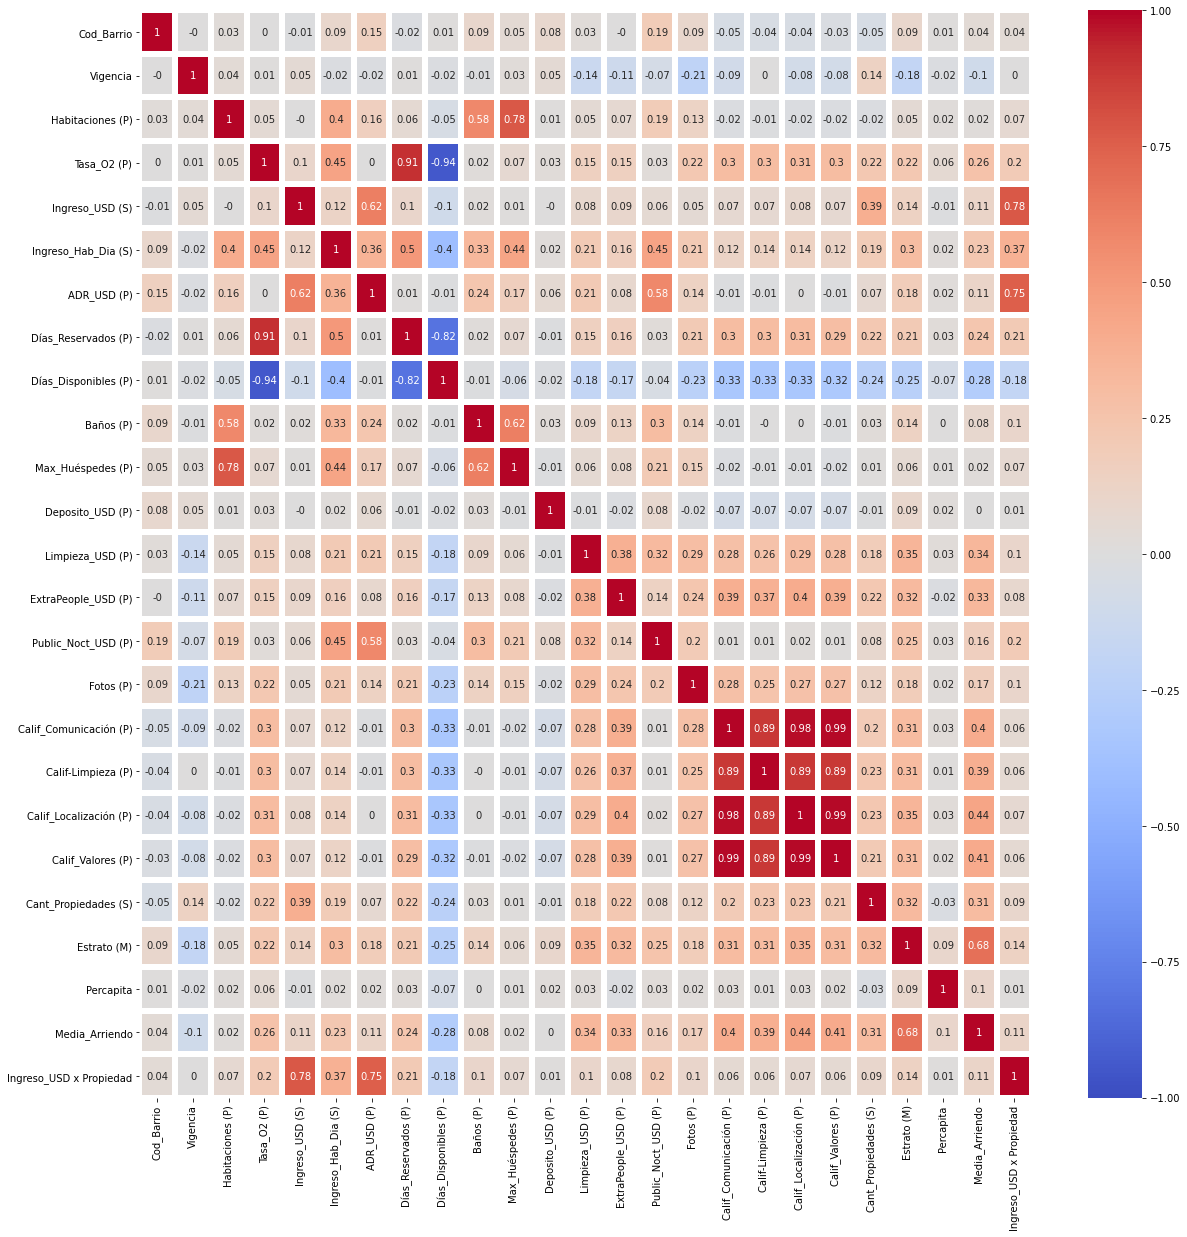

In [ ]:
# Correlaciones
plt.figure(figsize = (20,20))

sns.heatmap(data_Airbnb.corr().round(2), annot=True, 
            linewidths=5, linecolor='white',  # Grosor y color de la separación.
            cmap='coolwarm', vmin=-1);

# No hay variables que tengan una correlación fuerte salvo el par que calculan la tasa de ocupación y las variables de calificación que tienen una alta correlación entre ellas. 

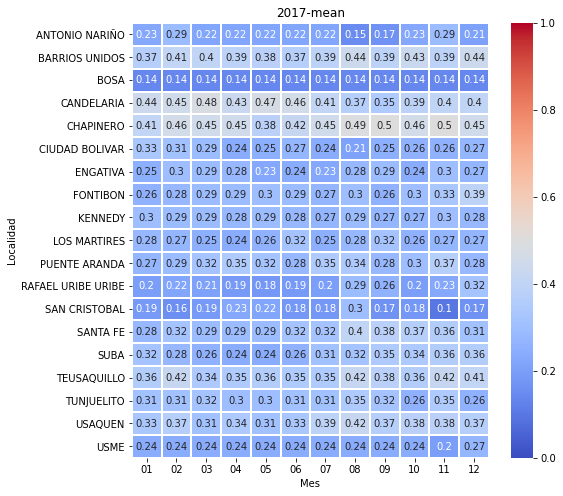

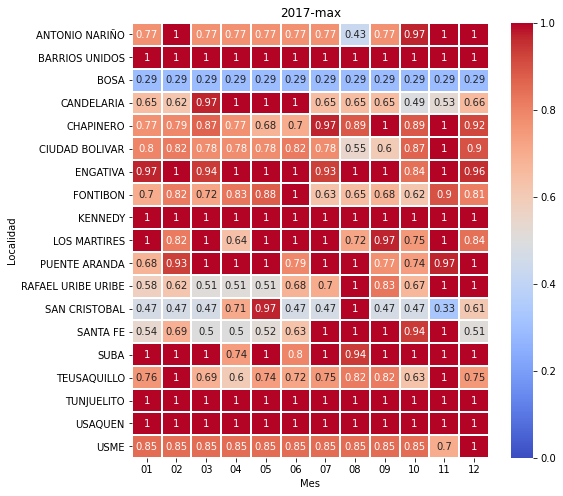

In [ ]:
#HEATMAP - Ocupación promedio y máxima por localidad
#Para validar cual es la tasa promedio para un determinado año se crea el siguiente método que realiza las tablas pivot y posteriormente el mapa de calor con los % de ocupación


def heatmap_anual(df,año, funcion):
  plt.figure(figsize = (8,8))
  plt.title(año + "-" + funcion)

  df_prov = df[df['Año']==año]
  pv_ocupacion= df_prov.pivot_table(values = "Tasa_O2 (P)",
                            index = "Localidad",
                            columns = "Mes",
                            aggfunc = funcion,
                            fill_value = 0)

  
  return sns.heatmap(pv_ocupacion.round(2), cmap= "coolwarm", annot= True, linewidths= 1, vmin = 0, vmax = 1), pv_ocupacion


heatmap_anual(data_Airbnb,"2017","mean");
heatmap_anual(data_Airbnb,"2017","max");

# Para el año 2017 observamos que la ocupación promedio  mes a mes, para cada localidad no supera el 50%, siendo Chapinero la localidad con mayores porcentajes de ocupación.
#Al revisar las localidades 

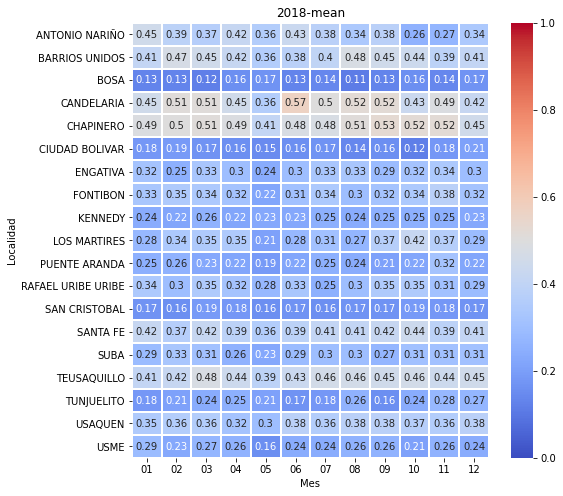

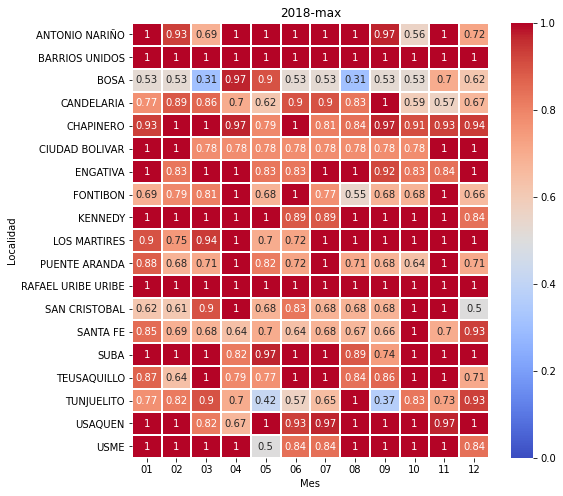

In [ ]:
#Realizamos el mismo heatmap para el año 2018

heatmap_anual(data_Airbnb,"2018","mean");
heatmap_anual(data_Airbnb,"2018","max");

#Se observa que en este caso es Candelaria la localidad que presenta el promedio de ocupación mas alto (en el mes de Junio)
#Respecto a los máximos se observa que Bosa pasa de presentar ocupaciones máximas de 29% en el 2017 a tener meses donde se tuvo barrios con ocupaciones mayores al 90% (Abril y Mayo)

### 3.3. Gráficos de Variables Categóricas vs ADR


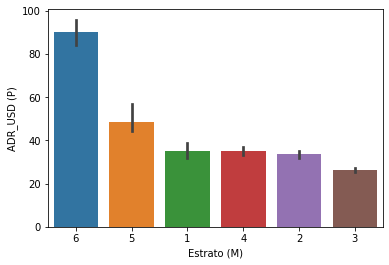

In [ ]:
# BarPlot Estrato vs ADR
sns.barplot(x = 'Estrato (M)', y = 'ADR_USD (P)', data = data_Airbnb, order = pd.DataFrame(data_Airbnb.groupby('Estrato (M)').agg(func = 'mean')['ADR_USD (P)'].sort_values(ascending = False)).index)

# El barplot confirma la baja correlación que hay entre estrato y tasa promedio diaria, ya que el tercer estrato que tiene una tarifa promedio más alta es el estrato 1 y no el estrato 3 como se pensaría a priori. 


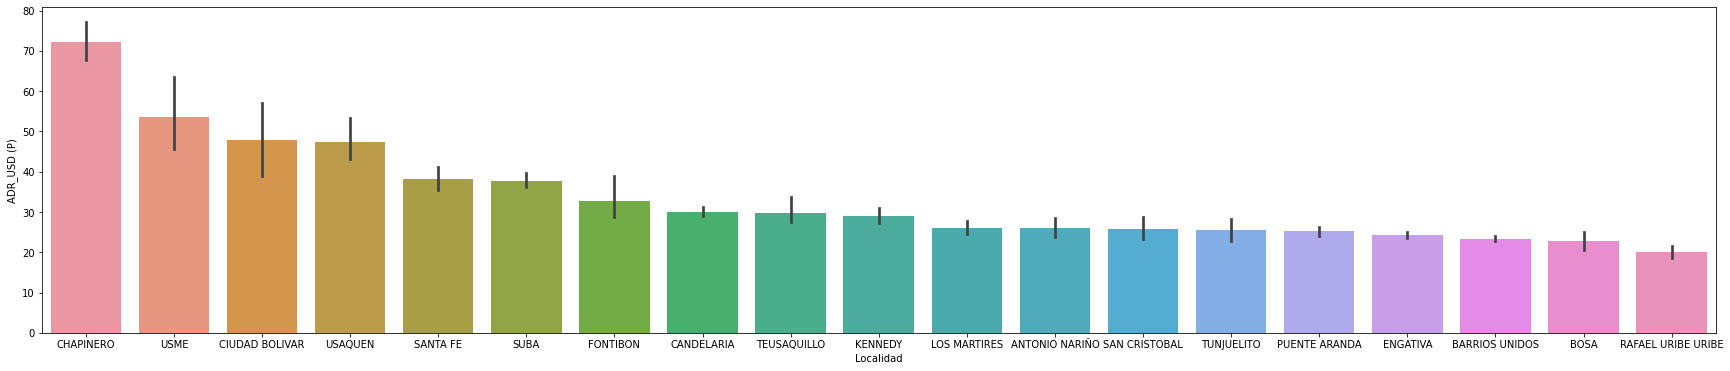

In [ ]:
# BarPlot Localidad vs ADR
fig = plt.figure(figsize=(30, 6))

sns.barplot(x = 'Localidad', y = 'ADR_USD (P)', data = data_Airbnb, order = pd.DataFrame(data_Airbnb.groupby('Localidad').agg(func = 'mean')['ADR_USD (P)'].sort_values(ascending = False)).index)

# De manera sorprendente, Usme y Ciudad Bolívar tienen las tasas promedio más altas que varrios como Usaquén y Candelaria que son mucho más solicitados según los datos
# que tenemos 

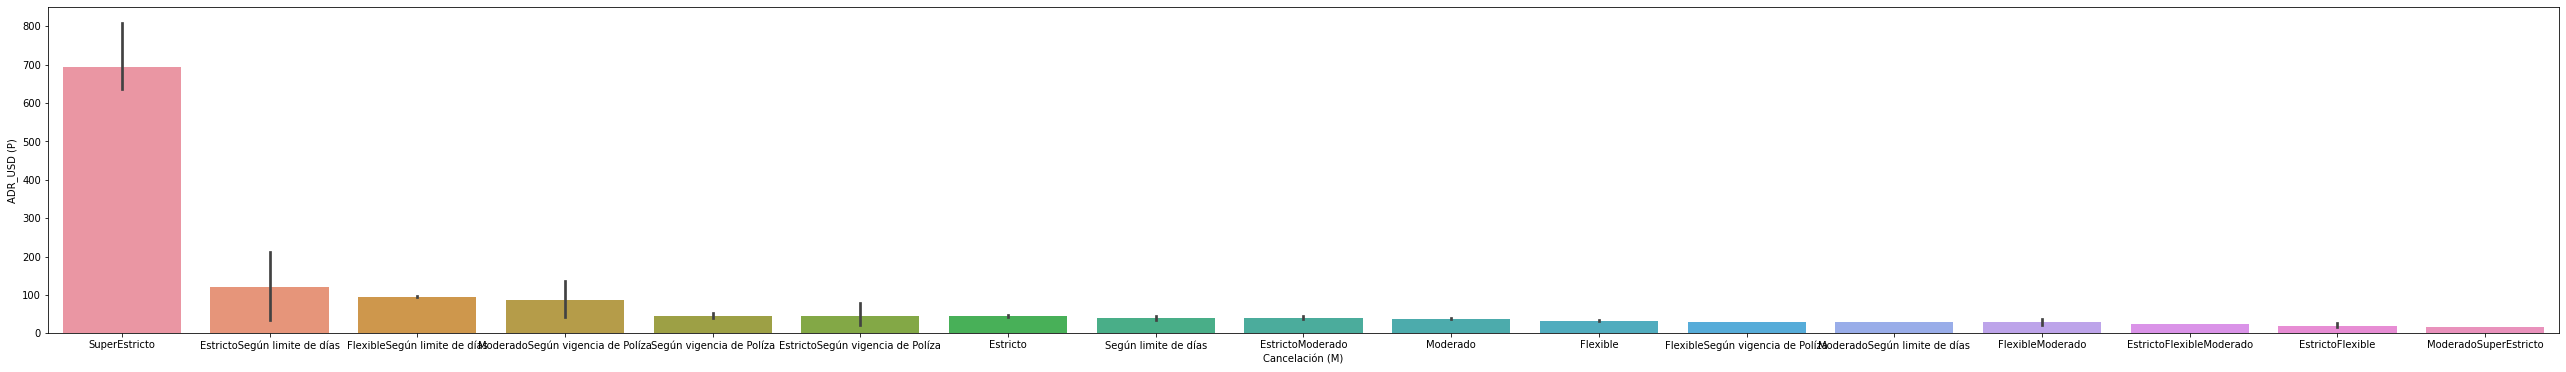

In [ ]:
fig = plt.figure(figsize=(45, 6))
sns.barplot(x = 'Cancelación (M)', y = 'ADR_USD (P)', data = data_Airbnb, order = pd.DataFrame(data_Airbnb.groupby('Cancelación (M)').agg(func = 'mean')['ADR_USD (P)'].sort_values(ascending = False)).index)
# En general, los airbnb con tarifas promedio más altas tienden a ser más estrictos con las políticas de cancelación, probablemente debido a una mayor dificultad a la hora 
# de retornar sumas de dinero más altas por medio de la plataforma

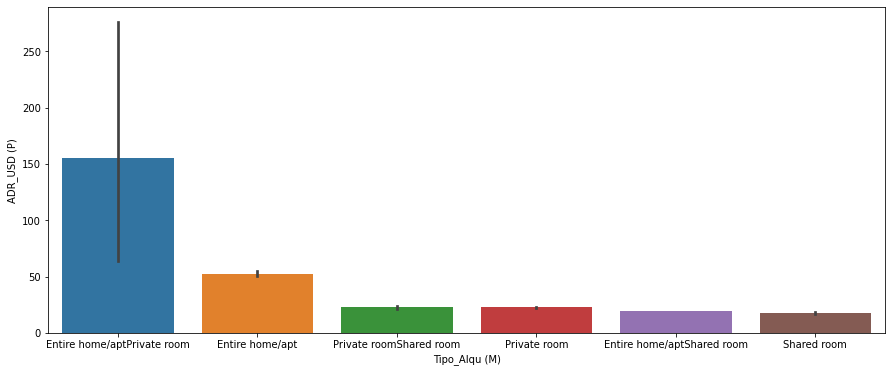

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x = 'Tipo_Alqu (M)', y = 'ADR_USD (P)', data = data_Airbnb, order = pd.DataFrame(data_Airbnb.groupby('Tipo_Alqu (M)').agg(func = 'mean')['ADR_USD (P)'].sort_values(ascending = False)).index)
# Las tarifas promedio son, sin ninguna sorpresa, más altas en cuanto el nivel de privacidad es mayor, localizando a las más bajas cuando la habitación es compartida.

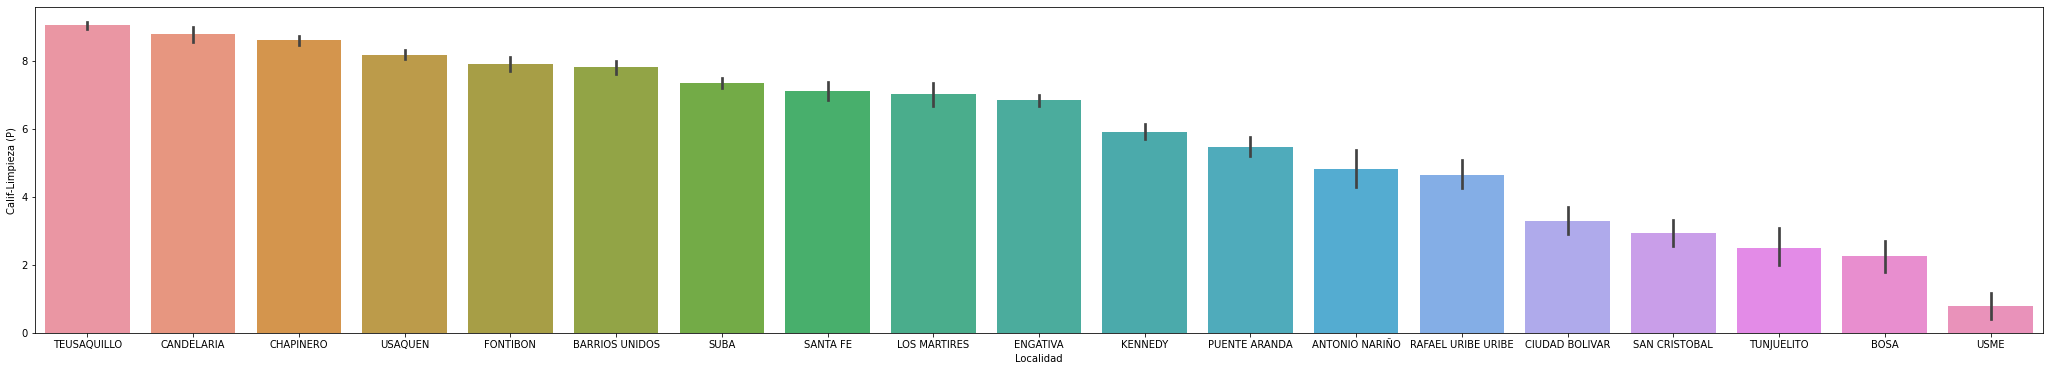

In [ ]:
#Limpieza mejor clasificadas por localidad

fig = plt.figure(figsize=(36, 6))
sns.barplot(x = 'Localidad', y = 'Calif-Limpieza (P)', data = data_Airbnb, order = pd.DataFrame(data_Airbnb.groupby('Localidad').agg(func = 'mean')['Calif-Limpieza (P)'].sort_values(ascending = False)).index)
# En general, las localidades con mejor calificación son aquellas más demandadas. En el caso de zonas más lejanas del centro, la calificación tiende a ser peor 
# La alta correlación entre las calificaciones, hace que no cambie el orden, independientemente del indicador que miremos


In [ ]:
# Se crea una columna con una clasificación promedio en las variables tipo likert. Dandole igual peso a todas las variables. Se puede entender como la clasificación global dada por las personas
data_Airbnb['Calif_Global (P)'] = data_Airbnb['Calif-Limpieza (P)']/4 + data_Airbnb['Calif_Localización (P)']/4 + data_Airbnb['Calif_Comunicación (P)']/4 + data_Airbnb['Calif_Valores (P)']/4
data_Airbnb.head(2)

,Cod_Barrio,Barrio,Vigencia,Fecha_Corte,Tipo_Aloj (M),Tipo_Alqu (M),Habitaciones (P),Tasa_O2 (P),Ingreso_USD (S),Ingreso_Hab_Dia (S),ADR_USD (P),Días_Reservados (P),Días_Disponibles (P),Baños (P),Max_Huéspedes (P),Deposito_USD (P),Limpieza_USD (P),ExtraPeople_USD (P),Cancelación (M),Public_Noct_USD (P),Fotos (P),Calif_Comunicación (P),Calif-Limpieza (P),Calif_Localización (P),Calif_Valores (P),Mascotas (M),Comodidades (M),Localidad,Cant_Propiedades (S),Estrato (M),Percapita,Media_Arriendo,Observación,Ingreso_USD x Propiedad,Mes,Año,Fecha_Corr,Calif_Global (P)
0,1424,BARCELONA SUR,2015,2015-05-01,Apartamento,Entire home/apt,3.0,0.064516,560.0,560.0,280.00,2.0,29.0,3.0,6,103.000000,10.0,10.0,Flexible,280.0,24.0,9.0,8.0,9.0,8.0,True,Estandar,SAN CRISTOBAL,1,2,188786.729858,413017.574290,Actividad,560.0,05,2015,05-2015,8.50
1,3101,LA ALAMEDA,2015,2015-05-01,Apartamento,Entire home/apt,2.0,0.434783,484.0,242.0,23.01,10.0,13.0,0.5,3,154.905437,10.0,7.0,Estricto,28.0,57.0,10.0,8.5,9.0,9.5,True,Estandar,SANTA FE,2,3,783426.478873,686904.950186,Actividad,242.0,05,2015,05-2015,9.25


In [ ]:
#Scatterplot para revisar la tasa promedio por barrio, localidad y estrato.

data_scatter = data_Airbnb.copy()

#Para simplificar el analisis se va a utilizar el ultimo año completo que se tiene (2018)
data_scatter = data_scatter[data_scatter['Año'] == "2018"]

#En vez de verlo a nivel mensual vamos a ver un promedio de todo año en cuanto a calificación y tarifa promedio
data_scatter = data_scatter.groupby(by = ['Barrio','Localidad','Estrato (M)'])['Calif_Global (P)','ADR_USD (P)','Cant_Propiedades (S)'].mean()
data_scatter.reset_index(inplace=True)
data_scatter.sort_values(by = 'Estrato (M)',inplace = True)

px.scatter(data_scatter, 
       y="Calif_Global (P)", 
       x="ADR_USD (P)",      
       color="Localidad",    
       facet_col="Estrato (M)", 
       #size = 'Cant_Propiedades (S)', #Para facilitar la visualización no se utilizó
       hover_data = ['Barrio','Cant_Propiedades (S)'])   

# Tenemos la ventaja de poder ver, por localidad y barrio, la tarifa promedio cobrada en cada una de las localidades contra la calificación global, segmentado por estratos. 
# en general Hay una correlación positiva a lo largo de los estratos entre la tarifa promedio y la calificación, a pesar de que hay unos outliers de tarifas altas cuyos Airbnb no 
# tienen una buena calificación.
# al acercarse a los puntos se puede ver el numero de propiedades (promedio mes) inscritas en Airbnb para cada barrio.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


In [ ]:
# Se realiza un gráfico con la evolución de los ingresos totales por localidad mes a mes, con esto vmeos cuales fueron las localidades que generan mayores ingresos por mes y si se mantiene 
data_Airbnb.sort_values(by= ['Año', 'Mes'], inplace= True)
fig = px.bar(data_Airbnb, 
       y="Ingreso_USD (S)",      
       x="Localidad",            
       color="Localidad",    
       animation_frame= "Fecha_Corr",      
       animation_group= 'Barrio',
       hover_data = ['Barrio', 'Vigencia'],
       range_y=[0, 1000000]
      ).update_layout(xaxis={'categoryorder':'total descending'}).update_layout(transition = {'duration': 100000})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig

# Esta gráfica muestra la evolución de los ingresos a través de los meses que tenemos mapeados en la data, en general, Chapinero es la localidad que más ingreso genera por medio de airbnb
# El usuario puede ver la evolución paso a paso de este ingreso por localidad 


###3.4 Comportamiento y distribución de los ingresos por localidad

In [ ]:
# De manera informativa se revisa el número de propiedades activas (por localidad) para cada mes.
airbnb_propiedades = data_Airbnb.copy( )
airbnb_propiedades= airbnb_propiedades.groupby(by = ['Localidad','Fecha_Corr'])['Cant_Propiedades (S)'].sum()
airbnb_propiedades = airbnb_propiedades.to_frame()
airbnb_propiedades.reset_index(inplace=True)

#Veamos los meses - localidad con mas propiedades registradas y activas.
airbnb_propiedades.sort_values(by='Cant_Propiedades (S)', ascending= False, inplace = True)
airbnb_propiedades.head(30)

,Localidad,Fecha_Corr,Cant_Propiedades (S)
179,CHAPINERO,01-2019,1475
183,CHAPINERO,02-2019,1469
221,CHAPINERO,12-2018,1408
217,CHAPINERO,11-2018,1364
213,CHAPINERO,10-2018,1352
209,CHAPINERO,09-2018,1328
205,CHAPINERO,08-2018,1298
193,CHAPINERO,05-2018,1230
201,CHAPINERO,07-2018,1219
197,CHAPINERO,06-2018,1192


In [ ]:
#Ahora revisamos por localidad el máximo de propiedades en una localidad registrado y el promedio mensual que tiene cada localidad

airbnb_propiedades_inf = airbnb_propiedades.groupby('Localidad').aggregate({'Cant_Propiedades (S)': [np.min,np.mean,np.max, np.std]})
airbnb_propiedades_inf.round(0).T

Localidad                  ANTONIO NARIÑO  BARRIOS UNIDOS  ...  USAQUEN  USME
Cant_Propiedades (S) amin             6.0            21.0  ...     70.0   1.0
                     mean            10.0           103.0  ...    478.0   5.0
                     amax            17.0           228.0  ...    950.0  11.0
                     std              3.0            63.0  ...    283.0   4.0

[4 rows x 19 columns]

In [ ]:
#Si se desean visualizar los datos a detalle (ingresos totales por localidad) en una tabla. 
#Usamos un dataframe de prueba con los valores sin decimales y agregado por año para simplificar

#Dejamos las cifras en miles de USD para facilitar la visualización.

prueba = data_Airbnb.copy()
prueba['Ingreso_USD (S)'] = prueba['Ingreso_USD (S)']/1000
prueba = prueba.round(2)

pvt_airbnb = prueba.pivot_table(values = "Ingreso_USD (S)",
                            index = "Localidad",
                            columns = "Año",
                            aggfunc = "sum",
                            margins = True,
                            fill_value = 0)

pvt_airbnb

#Observamos que los ingresos aumentan en una gran proporción para cada año (recordar que 2015 y 2019 no tienen información de 12 meses completos), 
#siendo Chapinero y Usaquen las localidades con mayores ingresos.


Año,2015,2016,2017,2018,2019,All
Localidad,,,,,,
ANTONIO NARIÑO,0.00,9.61,11.75,34.43,1.32,57.11
BARRIOS UNIDOS,52.62,157.43,389.92,640.26,113.53,1353.76
BOSA,0.32,8.40,1.92,15.98,1.08,27.70
CANDELARIA,130.84,320.02,516.52,746.76,177.37,1891.51
CHAPINERO,1502.63,3929.63,8149.95,12094.54,1988.81,27665.56
CIUDAD BOLIVAR,0.00,16.94,18.12,38.72,1.38,75.16
ENGATIVA,33.60,66.43,213.12,503.89,82.01,899.05
FONTIBON,70.33,261.27,556.64,1041.07,644.28,2573.59
KENNEDY,32.04,54.63,149.88,304.66,45.40,586.61


In [ ]:
#Validamos los porcentajes de ingresos para cada localidad sobre el total

#El total de ingresos en dolares para el período considerado.
total = data_Airbnb['Ingreso_USD (S)'].sum()

#porcentajes por localidad
porcentaje_localidades = (data_Airbnb.groupby('Localidad')['Ingreso_USD (S)'].sum()/total)*100
porcentaje_localidades.sort_values(ascending= False)

#Se puede observar que Chapinero y Usaquen representan mas del 66% de los ingresos totales para Airbnb en Bogotá. 

Localidad
CHAPINERO             45.645629
USAQUEN               22.242593
TEUSAQUILLO            6.681262
SANTA FE               6.006176
SUBA                   6.000065
FONTIBON               4.246742
CANDELARIA             3.120952
BARRIOS UNIDOS         2.234027
ENGATIVA               1.483744
KENNEDY                0.968275
PUENTE ARANDA          0.356855
LOS MARTIRES           0.292259
USME                   0.161427
RAFAEL URIBE URIBE     0.127650
CIUDAD BOLIVAR         0.124029
SAN CRISTOBAL          0.108779
ANTONIO NARIÑO         0.094233
TUNJUELITO             0.059428
BOSA                   0.045874
Name: Ingreso_USD (S), dtype: float64

In [ ]:
#Veamos la misma tabla pero con los ingresos por propiedad.
#Se usa el promedio en vez de la suma ya que al hablar de ingreso x propiedad ya no se esta trabajando con totales, si no con un promedio.

prueba = data_Airbnb.copy()
prueba = prueba.round(0)

pvt_airbnb_prop = prueba.pivot_table(values = "Ingreso_USD x Propiedad",
                            index = "Localidad",
                            columns = "Año",
                            aggfunc = "mean",
                            margins = True,
                            fill_value = 0)

pvt_airbnb_prop

#Chapinero que es la localidad que genra mas ingresos tammbíen es la que tiene un promedio de ingresos x propiedad mas alto.
#Cabe destacar casos como el de Fontibon y Usme que en los 2 meses que se tienen registro para el 2019 presentaron un promedio de ingresos x propiedad de más de 1000 USD

Año,2015,2016,2017,2018,2019,All
Localidad,,,,,,
ANTONIO NARIÑO,0.000000,133.513889,107.240741,242.975000,47.769231,162.853035
BARRIOS UNIDOS,289.302632,173.895833,253.905093,253.199074,248.559322,236.109664
BOSA,40.000000,233.333333,54.000000,71.782407,77.000000,87.893548
CANDELARIA,362.531250,291.944444,336.781250,349.864583,378.062500,333.418421
CHAPINERO,719.254753,499.150000,759.280303,787.622266,556.435897,685.330454
CIUDAD BOLIVAR,0.000000,281.950000,135.791667,128.020833,124.700000,149.223849
ENGATIVA,156.914474,82.420455,139.531746,212.340376,155.087719,154.641549
FONTIBON,310.812500,204.886667,249.675287,253.093137,1639.152542,312.292887
KENNEDY,240.416667,179.171569,188.871795,228.403642,208.533333,209.181574


In [ ]:
#Para observar el crecimiento de los ingresos se van a compara los años de 2016 a 2018 y ver el cambio porcentual por cada localidad.

pvt_airbnb_2 = pvt_airbnb.reset_index()
pvt_airbnb_2 = pvt_airbnb_2.loc[:,['Localidad','2016','2017','2018']]
pvt_airbnb_2['variación 2017'] = ((pvt_airbnb_2['2017'] - pvt_airbnb_2['2016'])/pvt_airbnb_2['2016'])*100
pvt_airbnb_2['variación 2018'] = ((pvt_airbnb_2['2018'] - pvt_airbnb_2['2017'])/pvt_airbnb_2['2017'])*100
pvt_airbnb_2

#Podemos observar que las variaciones porcentuales de los ingresos son de una gran magnitud, destacando localidades como Bosa donde los ingresos del 2017 caen en un 77% respecto al 2016,
#pero al siguiente año aumenta en un 732%.
#A nivel global observamos que se aumentaron los ingresos del 2017 al 2016 en un 111.7% y del 2018 respecto al 2017 en un 60.2%

Año,Localidad,2016,2017,2018,variación 2017,variación 2018
0,ANTONIO NARIÑO,9.61,11.75,34.43,22.268470,193.021277
1,BARRIOS UNIDOS,157.43,389.92,640.26,147.678333,64.202913
2,BOSA,8.40,1.92,15.98,-77.142857,732.291667
3,CANDELARIA,320.02,516.52,746.76,61.402412,44.575234
4,CHAPINERO,3929.63,8149.95,12094.54,107.397389,48.400174
5,CIUDAD BOLIVAR,16.94,18.12,38.72,6.965762,113.686534
6,ENGATIVA,66.43,213.12,503.89,220.818907,136.434872
7,FONTIBON,261.27,556.64,1041.07,113.051632,87.027522
8,KENNEDY,54.63,149.88,304.66,174.354750,103.269282
9,LOS MARTIRES,14.38,42.68,93.85,196.801113,119.892221


## 3.5 Regresiones Múltiples 
Usaremos sm.OLS para estimar regresiones mútliples en tres variables críticas: La tasa de ocupación, la calificación global (que fue calculada) y el ingreso por habitación

#### 3.5.1. Calificación Global

In [ ]:

# Se hará un modelo por localidades, para esto, se tendrán en cuenta sólo las dos localidades más importantes de Bogotá en términos de ingresos mensuales USD. 

# -- Modelo 1: Chapinero

Modelo_Cf_Global_CH = sm.regression.linear_model.OLS(data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO', ['Calif_Global (P)']], 
                                                  exog = (data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO',
                                                                                                     ['ExtraPeople_USD (P)',
                                                                                                      'Fotos (P)',
                                                                                                      'Tasa_O2 (P)',
                                                                                                      'Estrato (M)',
                                                                                                      'Cant_Propiedades (S)']]))


Resultado_Cf_Global_CH = Modelo_Cf_Global_CH.fit()
print(Resultado_Cf_Global_CH.summary())

# El modelo ajusta un 94% de la variación de la calificación global y todas las variables incluidas son significativas a un nivel de un 5%. Además, afecta mucho el tema de que la
# distribución de los datos no es normal (Prob(JB) = 7.52e-176)

                                 OLS Regression Results                                
Dep. Variable:       Calif_Global (P)   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              5836.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:24:22   Log-Likelihood:                         -4120.2
No. Observations:                1852   AIC:                                      8250.
Df Residuals:                    1847   BIC:                                      8278.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
px.scatter(x = data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO', 'Calif_Global (P)'], 
           y = Resultado_Cf_Global_CH.predict())

In [ ]:
# -- Modelo 2: Usaquén

Modelo_Cf_Global_US = sm.regression.linear_model.OLS(data_Airbnb.loc[data_Airbnb['Localidad']  == 'USAQUEN', ['Calif_Global (P)']], 
                                                  exog = (data_Airbnb.loc[data_Airbnb['Localidad']=='USAQUEN',
                                                                                                     ['ExtraPeople_USD (P)',
                                                                                                      'Fotos (P)',
                                                                                                      'Tasa_O2 (P)',
                                                                                                      'Estrato (M)',
                                                                                                      'Cant_Propiedades (S)']]))


Resultado_Cf_Global_US = Modelo_Cf_Global_US.fit()
print(Resultado_Cf_Global_US.summary())

# El modelo ajusta un 88.3% de la variación de la calificación global y todas las variables incluidas son significativas a un nivel de un 5%, salvo la cantidad de propiedades
# Además, afecta mucho el tema de que la distribución de los datos no es normal (Prob(JB) = 1.58e-165)

                                 OLS Regression Results                                
Dep. Variable:       Calif_Global (P)   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              3802.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:24:22   Log-Likelihood:                         -6396.8
No. Observations:                2517   AIC:                                  1.280e+04
Df Residuals:                    2512   BIC:                                  1.283e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
px.scatter(x = data_Airbnb.loc[data_Airbnb['Localidad']  == 'USAQUEN', 'Calif_Global (P)'], 
           y = Resultado_Cf_Global_US.predict())

#### 3.5.2 Tasa de ocupación

In [ ]:
# Se hará un modelo por localidades, para esto, se tendrán en cuenta sólo las dos localidades más importantes de Bogotá en términos de ingresos mensuales USD. 

# -- Modelo 1: Chapinero

Modelo_Tasa_Ocu_CH = sm.regression.linear_model.OLS(data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO', ['Tasa_O2 (P)']], 
                                                  exog = (data_Airbnb.loc[data_Airbnb['Localidad']=='CHAPINERO',
                                                                                                     ['Calif_Global (P)',
                                                                                                      'Fotos (P)',
                                                                                                      'Estrato (M)',
                                                                                                      'Media_Arriendo',
                                                                                                      'Limpieza_USD (P)']]))


Resultado_Tasa_Ocu_CH = Modelo_Tasa_Ocu_CH.fit()
print(Resultado_Tasa_Ocu_CH.summary())

# El modelo ajusta un 88% de la variación de la calificación global y todas las variables incluidas son significativas a un nivel de un 5%. Además, afecta mucho el tema de que la
# distribución de los datos no es normal (Prob(JB) = 3.54e-53)

                                 OLS Regression Results                                
Dep. Variable:            Tasa_O2 (P)   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              2734.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:24:22   Log-Likelihood:                          693.72
No. Observations:                1852   AIC:                                     -1377.
Df Residuals:                    1847   BIC:                                     -1350.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
px.scatter(x = data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO', 'Tasa_O2 (P)'], 
           y = Resultado_Tasa_Ocu_CH.predict())

In [ ]:
# Se hará un modelo por localidades, para esto, se tendrán en cuenta sólo las dos localidades más importantes de Bogotá en términos de ingresos mensuales USD. 

# -- Modelo 2: Usaquén

Modelo_Tasa_Ocu_US = sm.regression.linear_model.OLS(data_Airbnb.loc[data_Airbnb['Localidad']  == 'USAQUEN', ['Tasa_O2 (P)']], 
                                                  exog = (data_Airbnb.loc[data_Airbnb['Localidad']=='USAQUEN',
                                                                                                     ['Calif_Global (P)',
                                                                                                      'Fotos (P)',
                                                                                                      'Estrato (M)',
                                                                                                      'Media_Arriendo',
                                                                                                      'Limpieza_USD (P)']]))


Resultado_Tasa_Ocu_US = Modelo_Tasa_Ocu_US.fit()
print(Resultado_Tasa_Ocu_US.summary())

# El modelo ajusta un 75% de la variación de la calificación global y todas las variables incluidas son significativas a un nivel de un 5%. Además, afecta mucho el tema de que la
# distribución de los datos no es normal (Prob(JB) = 1.11e-133)

                                 OLS Regression Results                                
Dep. Variable:            Tasa_O2 (P)   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              1573.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:24:23   Log-Likelihood:                          486.99
No. Observations:                2517   AIC:                                     -964.0
Df Residuals:                    2512   BIC:                                     -934.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
px.scatter(x = data_Airbnb.loc[data_Airbnb['Localidad']  == 'USAQUEN', 'Tasa_O2 (P)'], 
           y = Resultado_Tasa_Ocu_US.predict())

#### 3.5.3. Ingreso USD

In [ ]:
# -- Modelo 1: Chapinero

Modelo_Ingreso_USD_CH = sm.regression.linear_model.OLS(data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO', ['Ingreso_Hab_Dia (S)']], 
                                                  exog = (data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO',
                                                                                                     ['Public_Noct_USD (P)',
                                                                                                      'Max_Huéspedes (P)',
                                                                                                      'Tasa_O2 (P)',
                                                                                                      #'Estrato (M)',
                                                                                                      #'Baños (P)',
                                                                                                      'Habitaciones (P)',
                                                                                                      'Cant_Propiedades (S)']]))


Resultado_Ingreso_USD_CH = Modelo_Ingreso_USD_CH.fit()
print(Resultado_Ingreso_USD_CH.summary())

# El modelo ajusta un 82.3% de la variación de la calificación global y todas las variables incluidas son significativas a un nivel de un 5%. Además, afecta mucho el tema de que la
# distribución de los datos no es normal (Prob(JB) = 0)

                                 OLS Regression Results                                 
Dep. Variable:     Ingreso_Hab_Dia (S)   R-squared (uncentered):                   0.823
Model:                             OLS   Adj. R-squared (uncentered):              0.823
Method:                  Least Squares   F-statistic:                              1718.
Date:                 Sat, 27 Mar 2021   Prob (F-statistic):                        0.00
Time:                         00:24:23   Log-Likelihood:                         -13756.
No. Observations:                 1852   AIC:                                  2.752e+04
Df Residuals:                     1847   BIC:                                  2.755e+04
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
px.scatter(x = data_Airbnb.loc[data_Airbnb['Localidad']  == 'CHAPINERO', 'Ingreso_Hab_Dia (S)'], 
           y = Resultado_Ingreso_USD_CH.predict())

In [ ]:
# -- Modelo 2: Usaquén

Modelo_Ingreso_USD_US = sm.regression.linear_model.OLS(data_Airbnb.loc[data_Airbnb['Localidad']  == 'USAQUEN', ['Ingreso_Hab_Dia (S)']], 
                                                  exog = (data_Airbnb.loc[data_Airbnb['Localidad']  == 'USAQUEN',
                                                                                                     ['Public_Noct_USD (P)',
                                                                                                      'Max_Huéspedes (P)',
                                                                                                      'Tasa_O2 (P)',
                                                                                                      #'Estrato (M)',
                                                                                                      #'Baños (P)',
                                                                                                      'Habitaciones (P)',
                                                                                                      'Cant_Propiedades (S)']]))


Resultado_Ingreso_USD_US = Modelo_Ingreso_USD_US.fit()
print(Resultado_Ingreso_USD_US.summary())

# El modelo ajusta un 72.9% de la variación de la calificación global y todas las variables incluidas son significativas a un nivel de un 5%. Además, afecta mucho el tema de que la
# distribución de los datos no es normal (Prob(JB) = 0)

                                 OLS Regression Results                                 
Dep. Variable:     Ingreso_Hab_Dia (S)   R-squared (uncentered):                   0.729
Model:                             OLS   Adj. R-squared (uncentered):              0.729
Method:                  Least Squares   F-statistic:                              1352.
Date:                 Sat, 27 Mar 2021   Prob (F-statistic):                        0.00
Time:                         00:24:23   Log-Likelihood:                         -17656.
No. Observations:                 2517   AIC:                                  3.532e+04
Df Residuals:                     2512   BIC:                                  3.535e+04
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
px.scatter(x = data_Airbnb.loc[data_Airbnb['Localidad']  == 'USAQUEN', 'Ingreso_Hab_Dia (S)'], 
           y = Resultado_Ingreso_USD_US.predict())

#Creación de un dataframe agrupado por localidades y Graficación en un mapa coropletico.


In [ ]:
#Se va a crear un dataframe agrupando por localidades y mes-año para ver los ingresos por localidad.
#Se saca la suma y la media para todos los datos, se deja un count para verificar el número de barrios que se registran en la localidad en la fecha de corte

airbnb_localidades = data_Airbnb.groupby(by= ['Localidad','Fecha_Corte']).aggregate({'Ingreso_USD (S)' : [np.sum,np.mean, np.count_nonzero],
                                                                                     'Ingreso_Hab_Dia (S)': [np.sum,np.mean],
                                                                                     'ADR_USD (P)': [np.mean]})

airbnb_localidades

Ingreso_USD (S)              ... Ingreso_Hab_Dia (S) ADR_USD (P)
                                       sum        mean  ...                mean        mean
Localidad      Fecha_Corte                              ...                                
ANTONIO NARIÑO 2016-01-01       801.500000  133.583333  ...          133.583333   36.524667
               2016-02-01       775.500000  129.250000  ...          129.250000   36.120000
               2016-03-01       825.500000  137.583333  ...          137.583333   35.911667
               2016-04-01       855.500000  142.583333  ...          142.583333   36.745000
               2016-05-01       676.500000  112.750000  ...          112.750000   37.995000
...                                    ...         ...  ...                 ...         ...
USME           2018-10-01      6020.500000  602.050000  ...          602.050000   52.512000
               2018-11-01      5913.500000  591.350000  ...          436.400000   47.039500
               2018-12-01      4980.944444  498.094444  ...          480.738889   48.407056
               2019-01-01         9.000000    9.000000  ...            9.000000    9.000000
               2019-02-01        10.000000   10.000000  ...           10.000000   10.000000

[838 rows x 6 columns]

In [ ]:
#Quitamos el formato multindice y lo simplificamos en un data frame
airbnb_localidades.columns = [ ''.join(x) for x in airbnb_localidades.columns ]
airbnb_localidades.reset_index(inplace=True)
airbnb_localidades

,Localidad,Fecha_Corte,Ingreso_USD (S)sum,Ingreso_USD (S)mean,Ingreso_USD (S)count_nonzero,Ingreso_Hab_Dia (S)sum,Ingreso_Hab_Dia (S)mean,ADR_USD (P)mean
0,ANTONIO NARIÑO,2016-01-01,801.500000,133.583333,6.0,801.500000,133.583333,36.524667
1,ANTONIO NARIÑO,2016-02-01,775.500000,129.250000,6.0,775.500000,129.250000,36.120000
2,ANTONIO NARIÑO,2016-03-01,825.500000,137.583333,6.0,825.500000,137.583333,35.911667
3,ANTONIO NARIÑO,2016-04-01,855.500000,142.583333,6.0,855.500000,142.583333,36.745000
4,ANTONIO NARIÑO,2016-05-01,676.500000,112.750000,6.0,676.500000,112.750000,37.995000
...,...,...,...,...,...,...,...,...
833,USME,2018-10-01,6020.500000,602.050000,10.0,6020.500000,602.050000,52.512000
834,USME,2018-11-01,5913.500000,591.350000,10.0,4364.000000,436.400000,47.039500
835,USME,2018-12-01,4980.944444,498.094444,10.0,4807.388889,480.738889,48.407056
836,USME,2019-01-01,9.000000,9.000000,1.0,9.000000,9.000000,9.000000


Para obtener las coordenadas o el poligono de las localidades de Bogotá se utilizó el json del repositorio ubicado en este [**'enlace'**](https://gist.github.com/jupaneira/a02af9ac03957aed15939ef72bfecfd2)

In [ ]:
#Descargamos el archivo desde drive.
!wget -q --no-check-certificate 'https://drive.google.com/uc?export=download&id=1VAIifCmPW5svSs5RwN-D36860WOT-qh8' -O bogota_localidades.json


In [ ]:
df_bogota = gpd.read_file('bogota_localidades.json')

In [ ]:
unique_localidad_df_bogota = pd.DataFrame(df_bogota['NOMBRE'].unique()).sort_values(by = 0)
unique_localidad_df_bogota.reset_index(drop = True, inplace= True)

In [ ]:
df_bogota.rename(columns={"NOMBRE": "Localidad"}, inplace = True)
df_bogota.head()

,id,OBJECTID,Localidad,CODIGO_LOC,DECRETO,LINK,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_AREA,SHAPE_LEN,geometry
0,None,1,SANTA FE,3,Acuerdo 117 de 2003,None,None,None,None,4.517065e+07,43779.905440,"POLYGON ((-74.06841 4.62880, -74.06807 4.62847..."
1,None,11,PUENTE ARANDA,16,Acuerdo 8 de 1977,None,None,None,None,1.731115e+07,17854.555403,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053..."
2,None,13,CIUDAD BOLIVAR,19,Acuerdo 14 de 1983,None,None,None,None,1.299864e+08,77732.027669,"POLYGON ((-74.15216 4.59976, -74.15218 4.59925..."
3,None,6,BARRIOS UNIDOS,12,Acuerdo 8 de 1977,None,None,None,None,1.190345e+07,13426.542795,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
4,None,2,SUBA,11,Acuerdo 8 de 1977,None,None,None,None,1.005606e+08,65665.349126,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."


In [ ]:
unique_localidad_df_airbnb = pd.DataFrame(airbnb_localidades['Localidad'].unique()).sort_values(by = 0)
unique_localidad_df_airbnb.reset_index(drop=True, inplace= True)


In [ ]:
#Revisamos que el nombre de localidad sea igual al de la base con los datos geograficos de las localidades.
#Se ignora la localidad de Sumapaz ya que en el dataframe de Airbnb no aparece

unique_localidad_df_airbnb.merge(unique_localidad_df_bogota, how = "inner")

,0
0,ANTONIO NARIÑO
1,BARRIOS UNIDOS
2,BOSA
3,CANDELARIA
4,CHAPINERO
5,CIUDAD BOLIVAR
6,ENGATIVA
7,FONTIBON
8,KENNEDY
9,LOS MARTIRES


In [ ]:
#Juntamos los 2 dataframes para poder graficar el mapa.

df_mapa_airbnb = df_bogota.merge(airbnb_localidades,on = "Localidad" ,how = "right")

#Dejamos solo las columnas que nos interesan.

df_mapa_airbnb = df_mapa_airbnb[['Localidad', 'geometry','Fecha_Corte' ,'Ingreso_USD (S)sum', 'Ingreso_USD (S)mean','Ingreso_USD (S)count_nonzero', 'Ingreso_Hab_Dia (S)sum', 'Ingreso_Hab_Dia (S)mean', 'ADR_USD (P)mean']]
df_mapa_airbnb.head()

,Localidad,geometry,Fecha_Corte,Ingreso_USD (S)sum,Ingreso_USD (S)mean,Ingreso_USD (S)count_nonzero,Ingreso_Hab_Dia (S)sum,Ingreso_Hab_Dia (S)mean,ADR_USD (P)mean
0,ANTONIO NARIÑO,"POLYGON ((-74.13075 4.59335, -74.12916 4.59327...",2016-01-01,801.5,133.583333,6.0,801.5,133.583333,36.524667
1,ANTONIO NARIÑO,"POLYGON ((-74.13075 4.59335, -74.12916 4.59327...",2016-02-01,775.5,129.250000,6.0,775.5,129.250000,36.120000
2,ANTONIO NARIÑO,"POLYGON ((-74.13075 4.59335, -74.12916 4.59327...",2016-03-01,825.5,137.583333,6.0,825.5,137.583333,35.911667
3,ANTONIO NARIÑO,"POLYGON ((-74.13075 4.59335, -74.12916 4.59327...",2016-04-01,855.5,142.583333,6.0,855.5,142.583333,36.745000
4,ANTONIO NARIÑO,"POLYGON ((-74.13075 4.59335, -74.12916 4.59327...",2016-05-01,676.5,112.750000,6.0,676.5,112.750000,37.995000


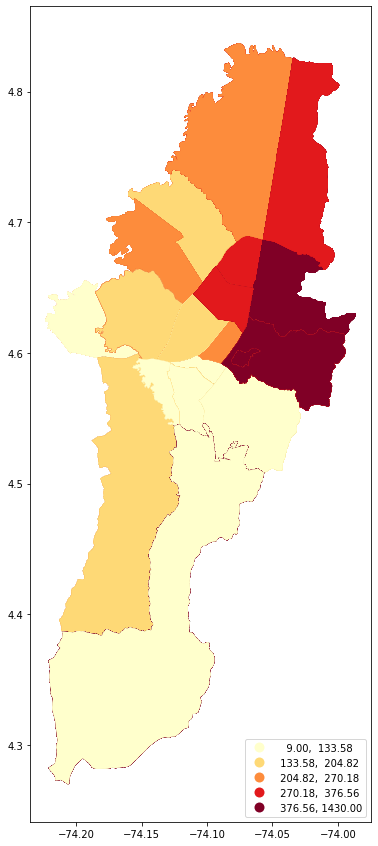

In [ ]:
## MAPA INGRESO POR HABITACIÓN PROMEDIO POR LOCALIDAD

df_mapa_airbnb.plot(column = 'Ingreso_Hab_Dia (S)mean',
                    cmap='YlOrRd',
                    scheme='quantiles',
                    legend = True,
                    figsize = (30,15),
                    legend_kwds={'loc': 'lower right'},
                    );

#Podemos observar que los ingresos por habitación promedio son mas altos en las zona norte de Bogota y en especial en el noroccidente donde el ingreso por habitación
#esta sobre los 270USD